Created on 2023-08-21
This notebook ...

TODO: Notebook description

In [6]:
## Library imports
import os
from utils import select_files, create_directory
from helper import create_fieldset, create_particleset, create_kernel, load_default_settings
from parcels import ParticleFile
#from plotting import plot_release_locations
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

import numpy as np
import json

# User options
TODO: Write a description here

In [7]:
## User options
testing_version = 'local'
if testing_version == 'local':
    user_settings = {'user': 'denes001',
                    'output_directory': '../../data/output_data/',
                    'fig_directory': '../../fig/',
                    }
else:
    user_settings = {'user': 'denes001',
                    'output_directory': '/storage/shared/oceanparcels/output_data/data_Michael/PlasticTransportKernels/data/output_data/',
                    'fig_directory': '/storage/shared/oceanparcels/output_data/data_Michael/PlasticTransportKernels/fig/',
                    }

## Create directories if missing
create_directory(user_settings['output_directory'])
create_directory(user_settings['fig_directory'])

# Model settings
TODO: Write a description here

In [8]:
## Model settings
model_settings, particle_settings = load_default_settings()

In [16]:
print("Model Settings")
print(json.dumps(model_settings, sort_keys=True, indent=4))

Model Settings
{
    "allow_time_extrapolation": false,
    "bathymetry_mesh": "MOi/domain_ORCA0083-N006/bathymetry_ORCA12_V3.3.nc",
    "bgc_algae_cell_volume": 2e-16,
    "bgc_algae_mortality_rate": 1.0,
    "bgc_algae_respiration_f": 1.0,
    "bgc_biofilm_density": 1388.0,
    "bgc_boltzmann_constant": 1.3805834190672156e-23,
    "bgc_carbon_atomic_weight": 12.0,
    "bgc_collision_probability": 1.0,
    "bgc_dir": "MOi/biomer4v2r1/",
    "bgc_filename": "biomer4v2r1-weekly_",
    "bgc_mesh": "MOi/domain_ORCA025-N006/mesh_hgr_PSY4V3_deg.nc",
    "bgc_respiration_rate": 1.1574074074074074e-06,
    "bgc_respiration_temperature_coefficient": 2.13,
    "bgc_shear_frequency": 2.0,
    "biofouling_f": true,
    "input_data_dir": "../../data/input_data/",
    "input_data_dir_2": "../../data/input_data/",
    "input_data_dir_3": "../../data/input_data/",
    "mixing_f": true,
    "mode": "3D",
    "ocean_dir": "MOi/psy4v3r1/",
    "ocean_filename": "psy4v3r1-daily_",
    "ocean_mesh": "MOi/

In [5]:
fieldset = create_fieldset(model_settings, particle_settings)

         It will be opened with no decoding. Filling values might be wrongly parsed.


# Particleset settings
TODO: Write description here -- user must define particle release locations

In [6]:
## Set particle release locations
n_particles = 2
lons = np.linspace(-35,-10,n_particles)
lats = np.linspace(30,60,n_particles)
depths = np.random.uniform(0,1000, n_particles)
#times = np.linspace(0,50000,n_particles)

release_locations = {'lons': lons,
                     'lats': lats,
                     'depths': depths,
#                     'times': times
}   


## Show particle release locations
#plot_release_locations(release_locations)

In [7]:
# Other settings
wind_test = np.random.uniform(0,0.05,n_particles)
density_test = np.random.uniform(1000,1050,n_particles)
diameter_test = np.random.uniform(0.00001, 0.01, n_particles)
## Particleset settings
particle_settings.update({'release_locations': release_locations, # A dictionary of lons, lats, depths (optional), and times (optional)
                          'windage_coefficient': wind_test, # A float or Nx1 array of windage coefficients, values in [0,1] [percent of wind speed]
                          'particle_density': density_test, # A float or Nx1 array of particle densities [kg m-3]
                          'particle_diameter': diameter_test, # A float or Nx1 array of particle lengths [m]
                          'write_output_option': 'all' # Option to write variables. Options: 'none' (default), 'tracer' (saves tracer fields), 'dynamic' (saves all variables that change spatiotemporally), 'all' (saves all variables)
                           })


pset = create_particleset(fieldset, particle_settings)

/Users/denes001/anaconda3/envs/py3_parcels/lib/python3.11/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)


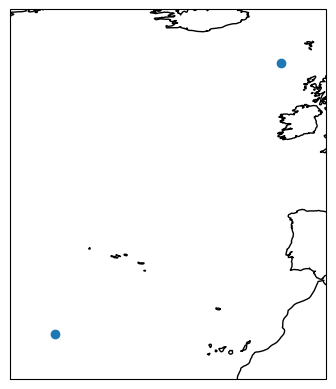

In [15]:
fig = plt.figure()
ax = plt.axes(projection=ccrs.PlateCarree())
ax.scatter(pset.lon, pset.lat, transform=ccrs.PlateCarree())
ax.coastlines()
ax.set_extent([np.min(pset.lon)-5, np.max(pset.lon)+5, np.min(pset.lat)-5, np.max(pset.lat)+5])
plt.show()

# Kernel creation
This should be pretty simple based on the flags above

In [16]:
kernels = create_kernel(fieldset, pset)
# Advection and execution

# Plotting, analysis, animations



In [18]:
kernels

[<function kernels.PolyTEOS10_bsq(particle, fieldset, time)>,
 <function parcels.application_kernels.advection.AdvectionRK4_3D(particle, fieldset, time)>,
 <function kernels.biofouling(particle, fieldset, time)>,
 <function kernels.Stokes_drift(particle, fieldset, time)>,
 <function kernels.windage_drift(particle, fieldset, time)>,
 <function kernels.vertical_mixing(particle, fieldset, time)>]

In [30]:

for test_kernel in kernels:
    pfile = ParticleFile(user_settings['output_directory']+test_kernel.__name__+'.zarr', pset, outputdt=particle_settings['dt_write'])
    pset.execute(test_kernel, runtime=particle_settings['runtime'], dt=particle_settings['dt_timestep'], output_file=pfile)


INFO: Compiled ArrayJITParticlePolyTEOS10_bsq ==> /var/folders/40/_dzhm_n16gn9bfdpc_8tcpf00000gp/T/parcels-502/libc8fe1d64c7c9d92e20a136ac9eed7e34_0.so


INFO: Compiled ArrayJITParticlePolyTEOS10_bsqAdvectionRK4_3D ==> /var/folders/40/_dzhm_n16gn9bfdpc_8tcpf00000gp/T/parcels-502/lib1a4eb1269568cd383110e37fe5c72fda_0.so
INFO: Output files are stored in ../../data/output_data/test.zarr.
 19%|█▉        | 64800.0/345600.0 [04:00<17:26, 268.37it/s]

: 

In [ ]:
fieldset.U.dataFiles

array(['../../data/input_data/MOi/psy4v3r1/psy4v3r1-daily_U_2019-01-09.nc',
       '../../data/input_data/MOi/psy4v3r1/psy4v3r1-daily_U_2019-01-10.nc',
       '../../data/input_data/MOi/psy4v3r1/psy4v3r1-daily_U_2019-01-11.nc',
       '../../data/input_data/MOi/psy4v3r1/psy4v3r1-daily_U_2019-01-12.nc',
       '../../data/input_data/MOi/psy4v3r1/psy4v3r1-daily_U_2019-01-13.nc'],
      dtype='<U65')